## Assignment 4
- Due date: March 22th
- total points: 75

**Part One (25 pts)**

In this part, we will be working on a COVID-19 dataset to explore the spatial-temporal trend of the COVID cases in the United States. The state level COVID-19 dataset we are using is from UN-OCHA Humanitarian Data Exchange (HDE) (https://data.humdata.org/dataset/nyt-covid-19-data). They compiles the time series data of cumulative counts of coronavirus cases in the United States, at the state and county level, over time. The dataset was originally released by the New York Times. and has been transformed from long format to wide format. 

(1) (5 pts) Import the dataset as a dataframe, and check how many rows and how many columns in the dataset. Check the data type of each column in the COVID dataframe using `df.types`. Make sure you have all the Date columns with data type "integer64" or "float64" rather than "object". The matplotlib will treat "object" columns as categorical variables when plotting. So make sure you have numeric variables presenting COVID cases in this step.

(2) (5 pts) We found there are 55 states and territories in the data, missing one inhabited territory American Samoa. For simplicity, we just keep the 49 contiguous states and Washington, D.C. in this exercise. So drop the rows corresponding to ['Alaska', 'Hawaii', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands']. Check the dataframe again to make sure you have 49 states left.

(3) (5 pts) Make a new DataFrame only storing the COVID data in 2020. In other words, the new dataframe should include all the columns from "2020-01-21 to "2020-12-31" plus the "State" column.

(4) (10 pts) Plot the trend line of COVID cases in 2020 for the following states: 
- New York, California, Massachusetts, Illinois, and Texas
- using Date as x-axis and confirm cases as y-axis 
- **Hint**: You can firstly set "States" as index, select the five states using `df.loc[]`, and assign them to a new dataframe. Then, using `.T` to transpose the new dataframe so that the Date variable can be the index and five States can be the column names. Skip the Nan Values for now.  
    
**Part two (20 pts)**: 

Now let us explore the spatial distribution of the COVID-19 cases using the COVID cases dataset we explored above and the US state boundary shapefile. Go to the homework folder, load the data ("tl_2017_us_state.shp") into your Jupyter notebook and print out the first five rows 

(1) (5 pts) Plot the state map and print out the crs. **A basic plot is good enough. you do not need to add additional artists to the map.**

(2) (5 pts) This is a shapefile containing all states and territories. Keep the polygons for the 49 states we use in the part one. **Note that we can use .isin() here.**. Plot the basic map again to double check.

(3) (5 pts) To make a choropleth map showing the COVID distribution, merge the COVID-19 data (the dataframe you obtained in Part One (6)) to the shapefile based on state names.

(4) (5 pts) Plot the choropleth map of the COVID-19 cases in 2020-21-31. Make sure you specify the appropriate color ramp, classification scheme, legend, and all other elements that you think helpful for interpreting the map.  

(5) (**Optional 0 pts**) Plot a combined map with subplots in 2X3 grid to show the trendency of COVID-19 cases. 
- the Dates to be plotted are 2020-07-01, 2020-08-01, 2020-09-01, 2020-10-01, 2020-11-01, 2020-12-01

**Part three (30 pts)**

In this final part, we first use a geocoded NYC property sales data set as point data (can be found here https://www.baruch.cuny.edu/confluence/display/geoportal/NYC+Geocoded+Real+Estate+Sales ). Download "real_property_sales_nyc_2017.zip" and unzip the file into the Jupyter Notebook folder. In addition to the point data, we use the polygon data for census tracts on Manhattan (another shapefiles). Find it here: https://catalog.data.gov/dataset/tiger-line-shapefile-2013-state-new-york-current-census-tract-state-based. After unzipping it, we can import the shapefile into Python using GeoPandas.

(1) (5 pts) filter the Manhattan data out for both the dataset. **hint: for point data, the Manhatten sales have "borough" values equal to 1; for polygon data, the Manhatten have COUNTYFP == 061.**

(2) (5 pts) Now the census tract data's coordinates are in WGS-84, the true coordinates on the spheroid. Project them into projected coordinates (on a flat x-y plane, in meter), same as the point data. Check the crs of the point data (manha_sale_17) and then project the polygon (census tract) data to it.

(3) Now we want to show visualize the number of housing transactions and the average housing price in each tract. 
- (5 pts) First, find the corresponding tract for each point by spatially joining the sale points and the census tracts. The resulting spatial joined dataframe should keep the geometric object (geometry column) of the housing point dataset. Print out your dataframe

- (5 pts) Second, get the count and the average price for each tract by groupby('TRACTCE') and .count() and .mean().

- (5 pts) Next, merge the count and the price information back to the census tract basemap ("manha_proj") using .merge.

- (5 pts) Finally, create choropleth maps with two subplots to show the number of housing transactions and the average price in each tract. **hint: you may choose to skip those NaN census tracts using .notna() or plot the NaN with hatching lines ///**

#### Part one

In [134]:
(1)
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [135]:
data = pd.read_excel('Homework/us_states_update.xlsx', engine = "openpyxl")
data.head(5)

,State,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11
0,Washington,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,344516,345193,346030,346733,347301,347391,348485,349196,349881,350661
1,Illinois,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1192860,1194960,1196739,1198242,1200720,1201760,1203008,1204693,1206362,1208072
2,California,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,...,3577497,3581900,3587155,3592219,3596488,3599242,3603413,3607544,3611008,3614568
3,Arizona,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,819281,820561,821474,823384,825119,826454,827237,827800,828630,830465
4,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,582844,584743,586310,588209,589931,591356,592344,593607,595264,597073


In [136]:
data.shape

(55, 417)

In [137]:
df.dtypes

2020-01-21    float64
2020-01-22    float64
2020-01-23    float64
2020-01-24    float64
2020-01-25    float64
               ...   
2021-03-07    float64
2021-03-08    float64
2021-03-09    float64
2021-03-10    float64
2021-03-11    float64
Length: 416, dtype: object

In [138]:
# (2)
drop_list = ['Alaska', 'Hawaii', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands']
data = data[~data['State'].isin(drop_list)]

In [139]:
# (3)
data_2020 = data.loc[:,"State":"2020-12-31"]

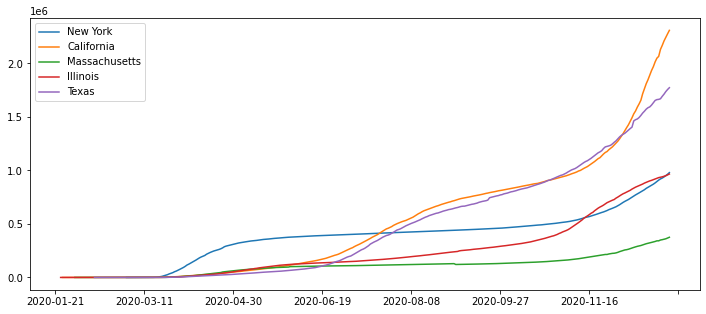

In [141]:
# (4) 
# set state as index
data_2020.set_index("State", inplace=True)

# select the target states
data_select = data_2020.loc[["New York", "California", "Massachusetts", "Illinois", "Texas"],:]

# show the trend of each states using line plot 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))
for i in ["New York", "California", "Massachusetts", "Illinois", "Texas"]:
    data_select.T.plot(kind = "line", y = i, ax = ax)

#### Part two

In [142]:
gdf_state = gpd.read_file("Homework/tl_2017_us_state/tl_2017_us_state.shp")
gdf_state.head(5)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


<AxesSubplot:>

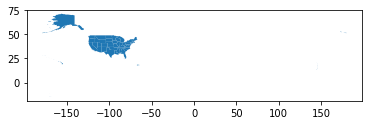

In [143]:
# (1)
gdf_state.plot()

In [144]:
# (1)
gdf_state.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [145]:
# (2)
gdf_state = gdf_state[gdf_state['NAME'].isin(data_2020.index)]

<AxesSubplot:>

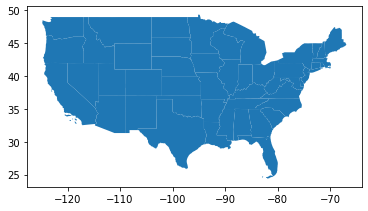

In [146]:
gdf_state.plot()

In [147]:
# (3)
gdf_merge = pd.merge(gdf_state, data_2020, how = 'left', left_on = 'NAME', right_index = True)
gdf_merge.columns

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
       'LSAD', 'MTFCC', 'FUNCSTAT',
       ...
       '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
       '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
      dtype='object', length=361)

In [148]:
gdf_merge

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,...,74737,75936,77239,78836,80177,80710,81436,82773,84225,85334
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,...,1223007,1234391,1247538,1247538,1264580,1271971,1280169,1292244,1306115,1323307
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,...,913265,919992,926967,932427,935849,939671,944402,950122,957853,965840
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,...,401070,402578,404462,404462,406604,409120,410197,411169,413166,415361
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,...,255666,258129,260994,263326,265606,267455,269442,271267,273881,276834
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,...,81187,82066,82066,82066,82066,82066,85602,86789,87949,87949
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,...,132950,134258,135383,135383,135886,136281,137449,138909,140150,141388
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,...,38008,38512,38902,38902,39933,40809,41670,42697,43242,44028
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,...,491242,497869,498005,498005,514724,517449,521990,526439,535120,541070
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,...,6608,6680,6781,6781,6966,7029,7120,7202,7276,7412


Text(0.5, 1.0, 'The total cases of COVID-19 in 2020-12-31')

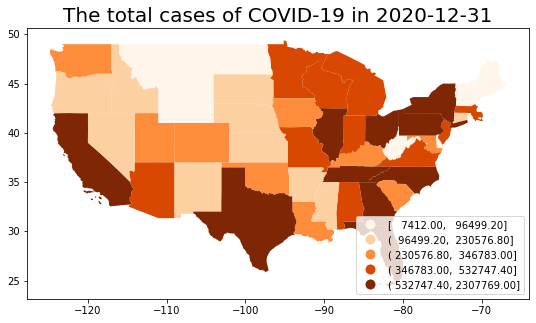

In [149]:
# (4) 
fig, ax = plt.subplots(1,1, figsize = (9,6))
gdf_merge.plot(column = '2020-12-31', 
               cmap = 'Oranges',
               scheme='quantiles', 
               k = 5,
               legend = True,
               ax = ax, 
               legend_kwds={'frameon': True, 
                            'loc': 'lower right',
                            'title_fontsize': 10,
                            'fontsize': 10})

ax.set_title("The total cases of COVID-19 in 2020-12-31", fontsize = 20)

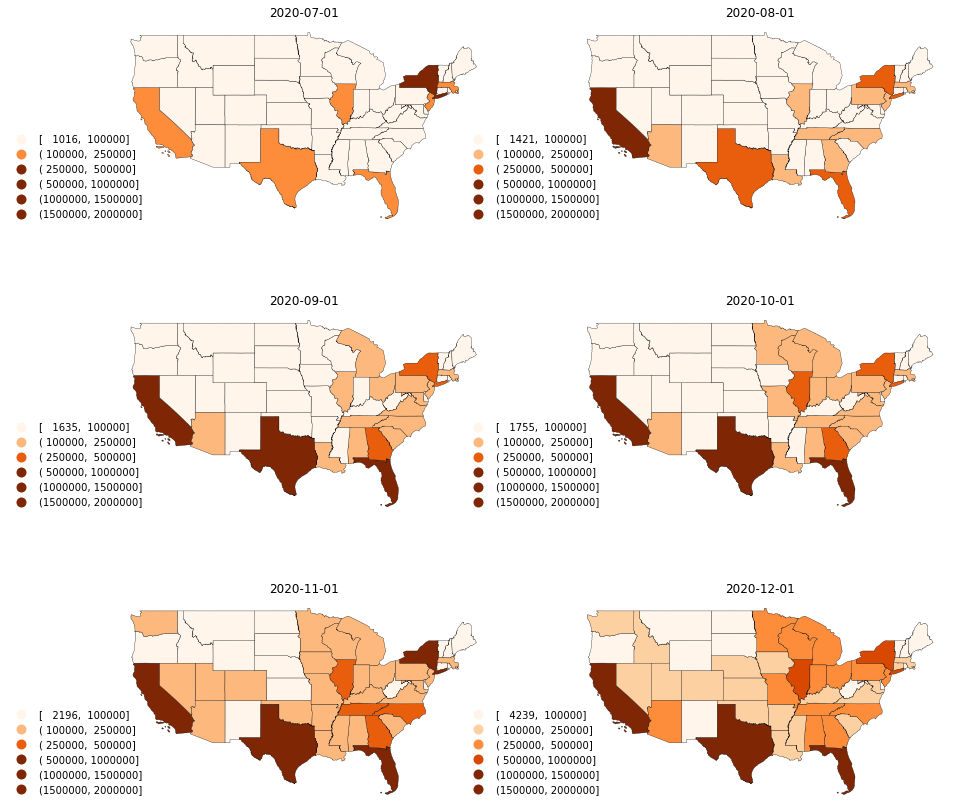

In [150]:
# (5)
column_list = ['2020-07-01', '2020-08-01', 
               '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01']

fig, ax = plt.subplots(3, 2, figsize = (15, 15))

for c in range(len(column_list)):
    x_pos = c%2
    y_pos = c//2
    gdf_merge.plot(ax = ax[y_pos, x_pos],
                   column = column_list[c], 
                   cmap = 'Oranges',
                   scheme='user_defined', 
                   classification_kwds={'bins':[100000, 250000, 500000, 1000000, 1500000, 2000000]},
                   edgecolor = 'black',
                   linewidth = 0.3,
                   legend = True,
                   legend_kwds = {'frameon': False,
                                  'loc': 'lower right'}
                  )
    ax[y_pos, x_pos].axis('off')
    ax[y_pos, x_pos].set_title(column_list[c])
    
    # optional 
    leg = ax[y_pos, x_pos].get_legend()
    leg.set_bbox_to_anchor((0., 0., 0.1, 0.1)) # set the place for a legend
    
    # optional
    # delete ".00" in legend items
    num_legend_item = len(ax[y_pos, x_pos].get_legend().get_texts())
    for i in range(num_legend_item):        
        new_text = ax[y_pos, x_pos].get_legend().get_texts()[i].get_text().replace('.00', '')
        ax[y_pos, x_pos].get_legend().get_texts()[i].set_text(new_text)

In [156]:
# part 3 (1)
nyc_sale_17 = gpd.read_file('Homework/real_property_sales_nyc_2017/real_property_sales_nyc_2017.shp')
manha_sale_17 = nyc_sale_17[nyc_sale_17['borough'] == 1]

ny = gpd.read_file('Homework/tl_2013_36_tract/tl_2013_36_tract.shp')
manha = ny[ny['COUNTYFP'] == '061']

In [160]:
# part 3 (2)
print(manha_sale_17.crs)
print(manha.crs)

epsg:2263
epsg:4269


In [166]:
manha_proj = manha.to_crs({'init': 'epsg:2263'})

In [167]:
manha_proj.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- E[east]: Easting (US survey foot)
- N[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [169]:
# part 3 (3)-1
manha_sale_17_join = gpd.sjoin(manha_sale_17, manha_proj, op='within')
manha_sale_17_join.columns

Index(['sale_id', 'bbl_id', 'year', 'borough', 'nbhd', 'bldg_ctgy',
       'tax_cls_p', 'block', 'lot', 'easmnt', 'bldg_cls_p', 'address', 'apt',
       'zip', 'res_unit', 'com_unit', 'tot_unit', 'land_sqft', 'tot_sqft',
       'yr_built', 'tax_cls_s', 'bldg_cls_s', 'sale_date', 'price', 'usable',
       'long', 'lat', 'georesult', 'message', 'geometry', 'index_right',
       'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'],
      dtype='object')

In [170]:
# part 3 (3)-2
count = manha_sale_17_join[['price', 'TRACTCE']].groupby('TRACTCE').count()
count.rename(columns = {'price':'count'}, inplace = True)   # rename the column "price" to "count" 

# get average price on each tract
price = manha_sale_17_join[['price', 'TRACTCE']].groupby('TRACTCE').mean()

# concatnate count and price
count_price = pd.concat([count, price], axis = 1)

In [171]:
count_price

,count,price
TRACTCE,,
000202,34,7.066177e+05
000600,18,1.392444e+07
000700,160,8.681681e+06
000800,16,1.224876e+06
000900,73,1.078285e+07
...,...,...
030700,55,3.680949e+05
030900,15,1.076460e+07
031100,1,3.900000e+05


In [172]:
# part 3 (3)-3
manha_merge = manha_proj.merge(count_price, how = 'left', left_on = 'TRACTCE', right_on = 'TRACTCE')
manha_merge.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'count', 'price'],
      dtype='object')

(975569.4451552175, 1011608.1413590494, 188686.93109145196, 264128.2730000339)

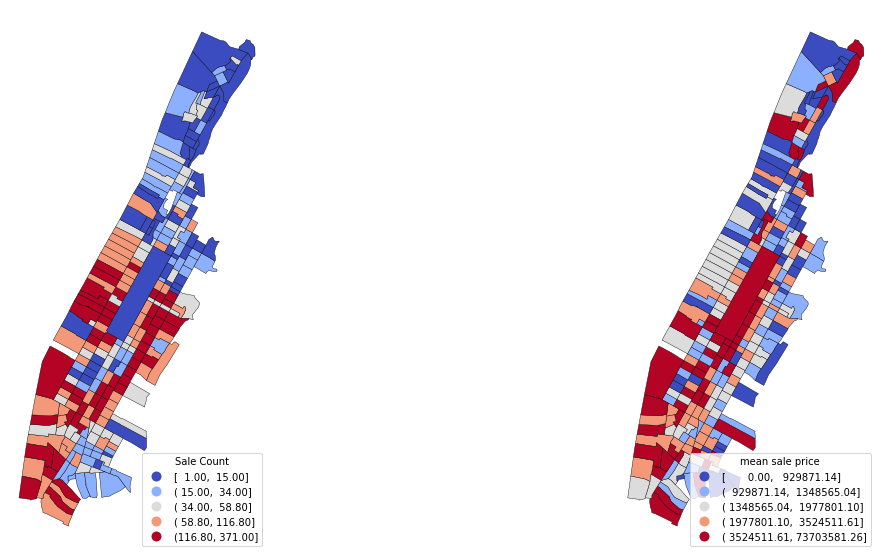

In [173]:
# part 3 (3)-4
# create a plot
fig, ax = plt.subplots(1, 2, figsize = (20, 10))


# plot count
manha_merge[manha_merge['count'].notna()].plot(ax = ax[0], column = 'count', cmap = 'coolwarm', 
                                                 scheme='quantiles', k = 5,
                                                 edgecolor='black', linewidth=0.4,
                                                 legend = True, legend_kwds={'frameon': True, 
                                                                           'loc': 'lower right',
                                                                           'title': 'Sale Count',
                                                                           'title_fontsize': 10,
                                                                           'fontsize': 10})
ax[0].axis('off')
# plot price
manha_merge[manha_merge['price'].notna()].plot(ax = ax[1], column = 'price', cmap = 'coolwarm', 
                                                 scheme='quantiles', k = 5,
                                                 edgecolor='black', linewidth=0.4,
                                                 legend = True, legend_kwds={'frameon': True, 
                                                                           'loc': 'lower right',
                                                                           'title': 'mean sale price',
                                                                           'title_fontsize': 10,
                                                                           'fontsize': 10})
ax[1].axis('off')